In [1]:
%matplotlib notebook
%matplotlib notebook

In [2]:
import spotpy
from optimizer import spotpy_setup
import numpy as np
import matplotlib.pyplot as plt
import camels_utilities
import pandas as pd

In [3]:
basin = '09066200'
forcings = camels_utilities.load_forcings(basin)
benchmark = camels_utilities.load_discharge(basin)
observations = camels_utilities.load_usgs(basin)
parameters = camels_utilities.load_sacsma_parameters(basin)

<IPython.core.display.Javascript object>


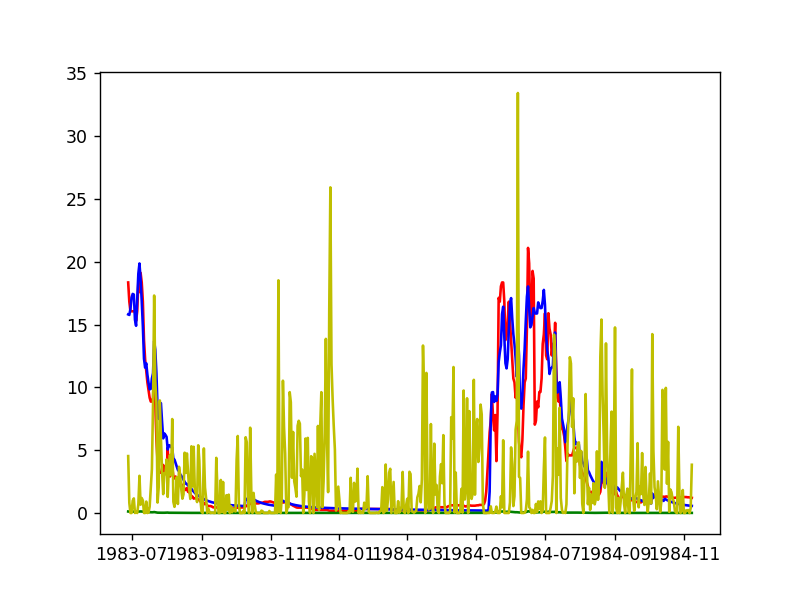

In [5]:
merged_df = pd.merge(forcings, benchmark, on='Date')
merged_df = pd.merge(merged_df, observations, on='Date')

fig = plt.figure()
plt.plot(merged_df['OBS_RUN'].iloc[1000:1500], 'r')
plt.plot(merged_df['MOD_RUN'].iloc[1000:1500], 'b')
plt.plot(merged_df['QObs'].iloc[1000:1500]/1000, 'g')
plt.plot(merged_df['PRCP(mm/day)'].iloc[1000:1500], 'y')

In [6]:
parameter_keys = ['uztwm', 'uzfwm', 'uzk', 'pctim', 
                  'adimp', 'riva', 'zperc', 'rexp', 
                  'lztwm', 'lzfsm', 'lzfpm', 'lzsk', 
                  'lzpk', 'pfree', 'side']
parameters[parameter_keys]

uztwm      9.631000
uzfwm    650.943000
uzk        0.630000
pctim      0.005000
adimp      0.000000
riva       0.000000
zperc     36.335000
rexp       3.715000
lztwm    157.763000
lzfsm    777.360000
lzfpm    288.050000
lzsk       0.088000
lzpk       0.005000
pfree      0.835000
side       0.000000
dtype: object

In [7]:
optimizer = spotpy_setup()

In [8]:
state_values = np.array([10,10,10,10,10,10])
parm_values = np.concatenate((parameters[parameter_keys].values, np.array([10,10,10,10,10,10])))
print(parm_values)
simulation = optimizer.simulation(parm_values)

['9.631000' '650.943000' '0.630000' '0.005000' '0.000000' '0.000000'
 '36.335000' '3.715000' '157.763000' '777.360000' '288.050000' '0.088000'
 '0.005000' '0.835000' '0.000000' 10 10 10 10 10 10]


In [9]:
observations = spotpy_setup().evaluation()
simulation.shape

(12510,)

<IPython.core.display.Javascript object>


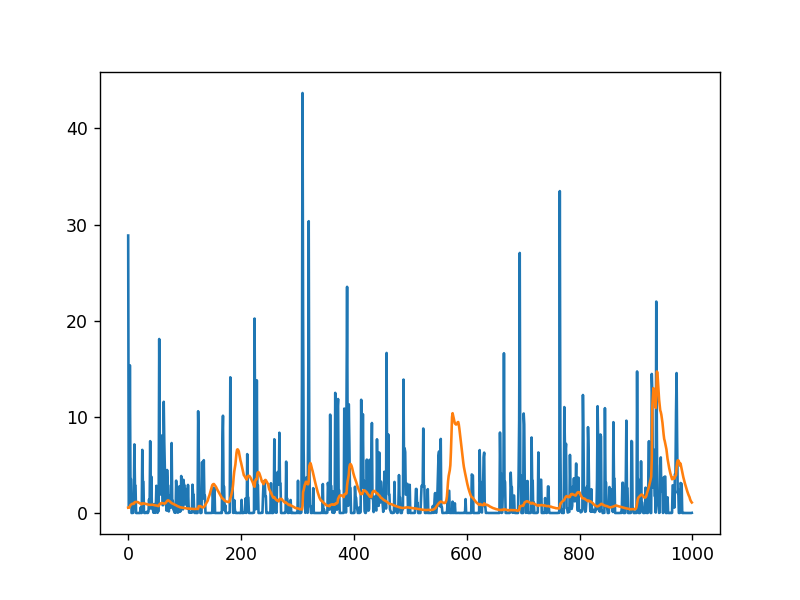

In [10]:
fig = plt.figure()
plt.plot(simulation[:1000])
plt.plot(observations[:1000])
plt.show()

In [11]:
sampler=spotpy.algorithms.sceua(optimizer, 
                                dbname='SCE', 
                                dbformat='csv')
max_model_runs = 1e4
sampler.sample(max_model_runs, ngs=20)

Initializing the  Shuffled Complex Evolution (SCE-UA) algorithm  with  10000.0  repetitions
The objective function will be minimized
Starting burn-in sampling...
Initialize database...
['csv', 'hdf5', 'ram', 'sql', 'custom', 'noData']
* Database file 'SCE.csv' created.
13 of 10000, minimal objective function=4.07116, time remaining: 00:24:08
27 of 10000, minimal objective function=4.07116, time remaining: 00:24:36
41 of 10000, minimal objective function=4.07116, time remaining: 00:24:40
55 of 10000, minimal objective function=4.06973, time remaining: 00:24:46
69 of 10000, minimal objective function=4.06973, time remaining: 00:24:47
83 of 10000, minimal objective function=4.06573, time remaining: 00:24:40
97 of 10000, minimal objective function=4.06445, time remaining: 00:24:34
111 of 10000, minimal objective function=4.06445, time remaining: 00:24:33
125 of 10000, minimal objective function=4.06445, time remaining: 00:24:33
139 of 10000, minimal objective function=4.0607, time remainin

5539 of 10000, minimal objective function=2.56793, time remaining: 00:06:23
5650 of 10000, minimal objective function=2.56793, time remaining: 00:06:13
5758 of 10000, minimal objective function=2.56793, time remaining: 00:06:03
5869 of 10000, minimal objective function=2.56793, time remaining: 00:05:52
5978 of 10000, minimal objective function=2.56793, time remaining: 00:05:42
6091 of 10000, minimal objective function=2.56793, time remaining: 00:05:32
6197 of 10000, minimal objective function=2.56793, time remaining: 00:05:22
6313 of 10000, minimal objective function=2.56793, time remaining: 00:05:12
6424 of 10000, minimal objective function=2.56793, time remaining: 00:05:02
6533 of 10000, minimal objective function=2.56793, time remaining: 00:04:52
6649 of 10000, minimal objective function=2.56793, time remaining: 00:04:41
6761 of 10000, minimal objective function=2.56793, time remaining: 00:04:32
6867 of 10000, minimal objective function=2.56793, time remaining: 00:04:22
6990 of 1000

10825 of 10000, minimal objective function=2.56793, time remaining: 23:58:53
Skipping saving
Skipping saving
Skipping saving
Skipping saving
Skipping saving
Skipping saving
Skipping saving
Skipping saving
Skipping saving
Skipping saving
Skipping saving
Skipping saving
Skipping saving
Skipping saving
Skipping saving
Skipping saving
Skipping saving
Skipping saving
Skipping saving
Skipping saving
Skipping saving
Skipping saving
Skipping saving
Skipping saving
Skipping saving
Skipping saving
Skipping saving
Skipping saving
Skipping saving
Skipping saving
Skipping saving
Skipping saving
Skipping saving
Skipping saving
Skipping saving
Skipping saving
Skipping saving
Skipping saving
Skipping saving
Skipping saving
Skipping saving
Skipping saving
Skipping saving
10940 of 10000, minimal objective function=2.56793, time remaining: 23:58:44
Skipping saving
Skipping saving
Skipping saving
Skipping saving
Skipping saving
Skipping saving
Skipping saving
Skipping saving
Skipping saving
Skipping savin

In [ ]:
results = sampler.getdata()

In [ ]:
spotpy.analyser.get_maxlikeindex(results)[0]
spotpy.analyser.get_minlikeindex(results)[0][0][0]

In [ ]:
simulation = np.array(results[spotpy.analyser.get_maxlikeindex(results)[0][0][0]].item())
fig = plt.figure()
plt.plot(simulation)
plt.plot(observations)

In [ ]:
simulation = np.array(results[spotpy.analyser.get_minlikeindex(results)[0][0][0]].item())
fig = plt.figure()
plt.plot(simulation)
plt.plot(observations)

In [ ]:
obs

In [ ]:
import glob
DATA_DIR = '/home/gsnearing/projects/camels_data'
filename = glob.glob(f'{DATA_DIR}/basin_dataset_public_v1p2/usgs_streamflow/**/{basin}_streamflow_qc.txt')[0]
print(filename)
col_names = ['basin', 'Year', 'Mnth', 'Day', 'QObs', 'flag']
obs = pd.read_csv(filename, sep='\s+', header=None, names=col_names)
obs['Date'] = (obs.Year.map(str) + "/" + obs.Mnth.map(str) + "/" + obs.Day.map(str))
obs = obs.set_index('Date')
